<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Parcial2/Punto_1_Parcial_2_se%C3%B1ales_y_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1. Expresión del espectro de Fourier de la señal x(t)

Para calcular el espectro con la serie exponencial de Fourier  $$c_n = \frac{1}{T}\int_T x(t)e^{-jn\omega_ot}dt$$

In [45]:
#Librerías
import matplotlib as mpl
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import warnings
from ipywidgets import interact,IntSlider
from matplotlib import animation, rc
from IPython.display import HTML
warnings.filterwarnings("ignore")


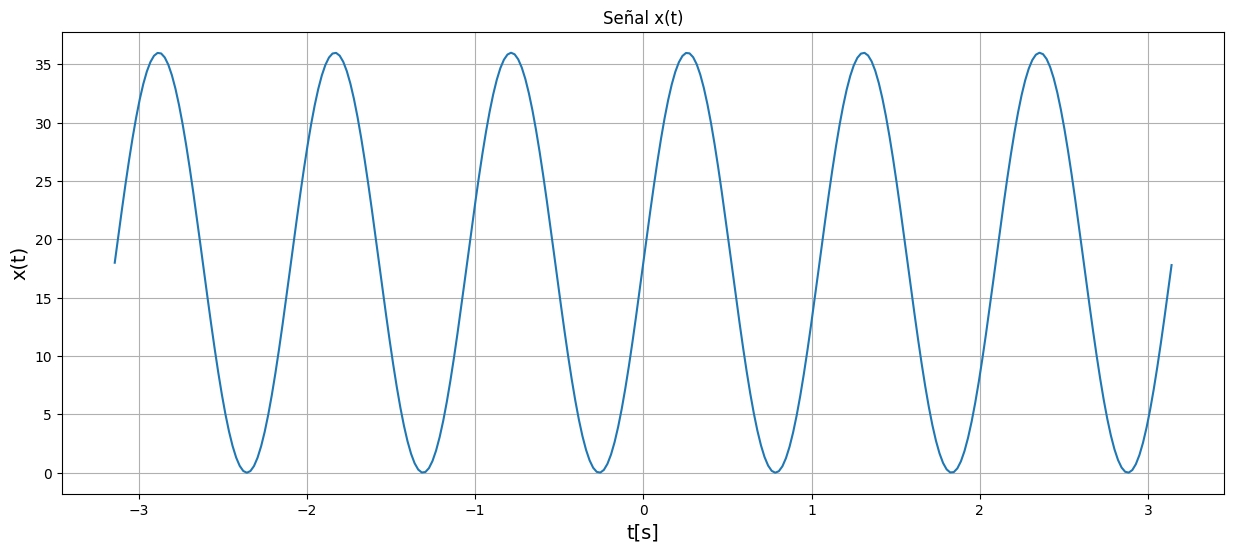

In [46]:
#Señal seno
ti = -np.pi
tf = np.pi
T = tf - ti
Fo = 3/2*np.pi
Fs = 2*Fo #siguiendo el teorema de Nyquist
#con el fin de tomar una mejor frecuencia de muestreo aumentamos el valor por 10
Fs = 10*Fo
vt = np.arange(ti, tf, 1/Fs) #vector tiempo
x = np.abs(6*np.sin(3*vt + (np.pi/4)))**2
plt.figure(figsize=(15,6))
plt.grid()
plt.title("Señal x(t)")
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.plot(vt,x)
plt.show()


Matriz de armónicos para ilustrar las bases de Fourier

In [47]:
M = len(vt)
N = 10 #número de armónicos
Wo = 2*np.pi/T #frecuencia fundamental
bases = np.zeros((M,2*N+1),dtype=np.complex_) #matriz
for n in range(-N,N+1,1):
    bases[:,n+N] = np.exp(1j*n*Wo*vt)
bases.shape

(297, 21)

Representación de las bases de Fourier

In [57]:
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(vt,np.real(bases[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(vt,np.imag(bases[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(vt,x,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return

interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

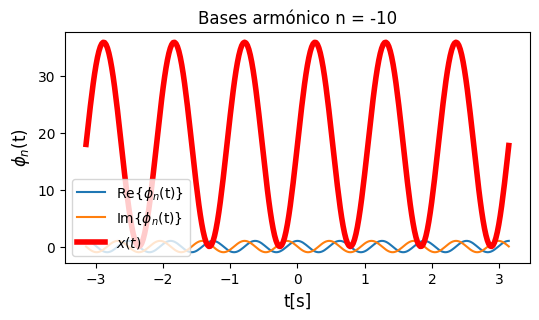

In [49]:
#figura y axes animaciónx
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    ax.clear()
    ax.plot(vt,np.real(bases[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(vt,np.imag(bases[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(vt,x,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')
anim

Transformada de Fourier de la señal


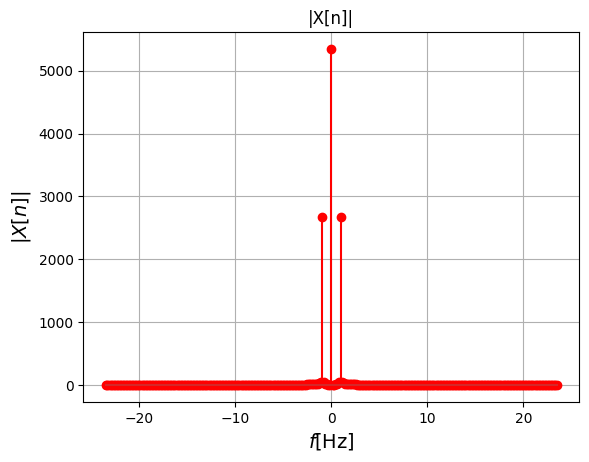

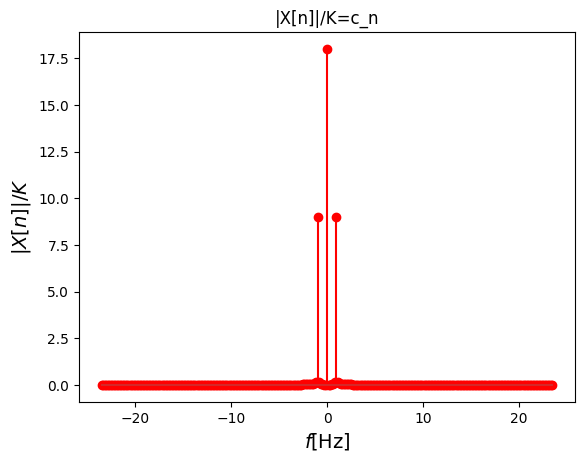

In [50]:
vf = np.fft.fftfreq(len(x),1/Fs) #calculo vector de frecuencias
XF = np.fft.fft(x) #cálculo FFT

plt.stem(vf,abs(XF),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(XF)/len(vf),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
plt.show()

Cálculo del espectro de la señal

In [51]:
# Para calcular el armónico cero
t, n, Wo = sym.symbols('t n Wo')

x2 = sym.Abs(6 * sym.sin(3 * t + sym.pi / 4))**2

# Cálculo de A0
A0 = (1 / (2 * sym.pi)) * sym.integrate(x2, (t, -sym.pi, sym.pi))
print("A0 =", A0)

A0 = 18


In [52]:
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
cn[N] = 18 #Nivel DC de la señal
cn[N - 6] = -9
cn[N + 6] = -9

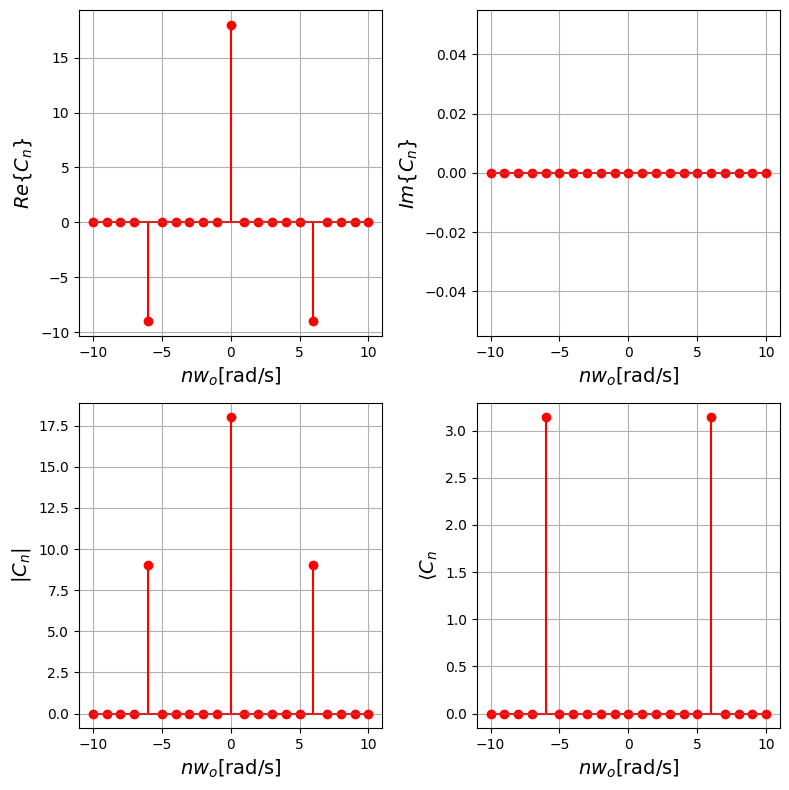

In [53]:
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Reconstrucción de la Señal

In [54]:
t = sym.symbols('t', Real = True)
x3 = 6*sym.sin(3*t + sym.pi/4) #señal propuesta
x4 = np.abs(x3)**2 #señal en valor absoluto
Integral = sym.integrate(x4, (t,-sym.pi, sym.pi))
P = Integral/sym.pi
print("La potencia de la señal es: ")
Px = P/2
Px

La potencia de la señal es: 


18

In [55]:
er = 1 - (((cn[N-6])**2)+((cn[N+6])**2)+((cn[N])**2))
er

(-485+0j)

In [56]:
Px = 18
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px #señal reconstruida
    xe = bases[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(vt,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(vt,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>